<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>February 3, 2017: refactoring
<br>September 15, 2016: promoted as tutorial, doc
<br>September 14, 2016: refactoring, nodes zooming
<br>September 13, 2016: loading and storing big graphs as JSON streams
<br>September 9, 2016: asynchronous fetching, cleaning
<br>September 8, 2016: synchronous fetching, drawing
</small>
</div>
</p>
<p>
<div align="center">
<b>Abstract</b><br>
Drawing graphs according to cross-references among sequences in the <a href="http://oeis.org">OEIS</a>.
</div>
</p>

The following cell import the function `oeis_search` in order to query the *Online Encyclopedia of Integer Sequences* and render search results directly in the current notebook; for details, see the [tutorial][oeis-pp].

[oeis-pp]:http://nbviewer.jupyter.org/github/massimo-nocentini/oeis-tools/blob/master/notebooks/oeis-interaction.ipynb

In [1]:
import graphing, commons

on the other hand, for develop sessions:

In [2]:
%run ../src/graphing.py

usage: graphing.py [-h] [--directed] [--cache-dir CACHE_DIR]
                   [--graphs-dir GRAPHS_DIR] [--dpi DPI] [--layout LAYOUT]
                   F
graphing.py: error: the following arguments are required: F


SystemExit: 2

finally, setup `matplotlib` plotting stuff:

In [3]:
%matplotlib inline

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

# Grapher

   - A link to the official documentation with many graph algorithms provided by `networkx` module: https://networkx.readthedocs.io/en/stable/reference/algorithms.html
   - A link to the drawing algorithm behind `spring_layout`: https://en.wikipedia.org/wiki/Force-directed_graph_drawing#cite_note-1

In [28]:
graph = graphing.graph_load(cache_dir='../src/fetched/')

In [29]:
G, nodes, edges = graphing.make_nx_graph(graph)#, node_remp=lambda n, G: G.out_degree(n) > 2)

In [20]:
G, nodes, edges = graphing.make_nx_graph(graph, node_remp=lambda n, G: 'nice' not in graph[n]['keyword'])

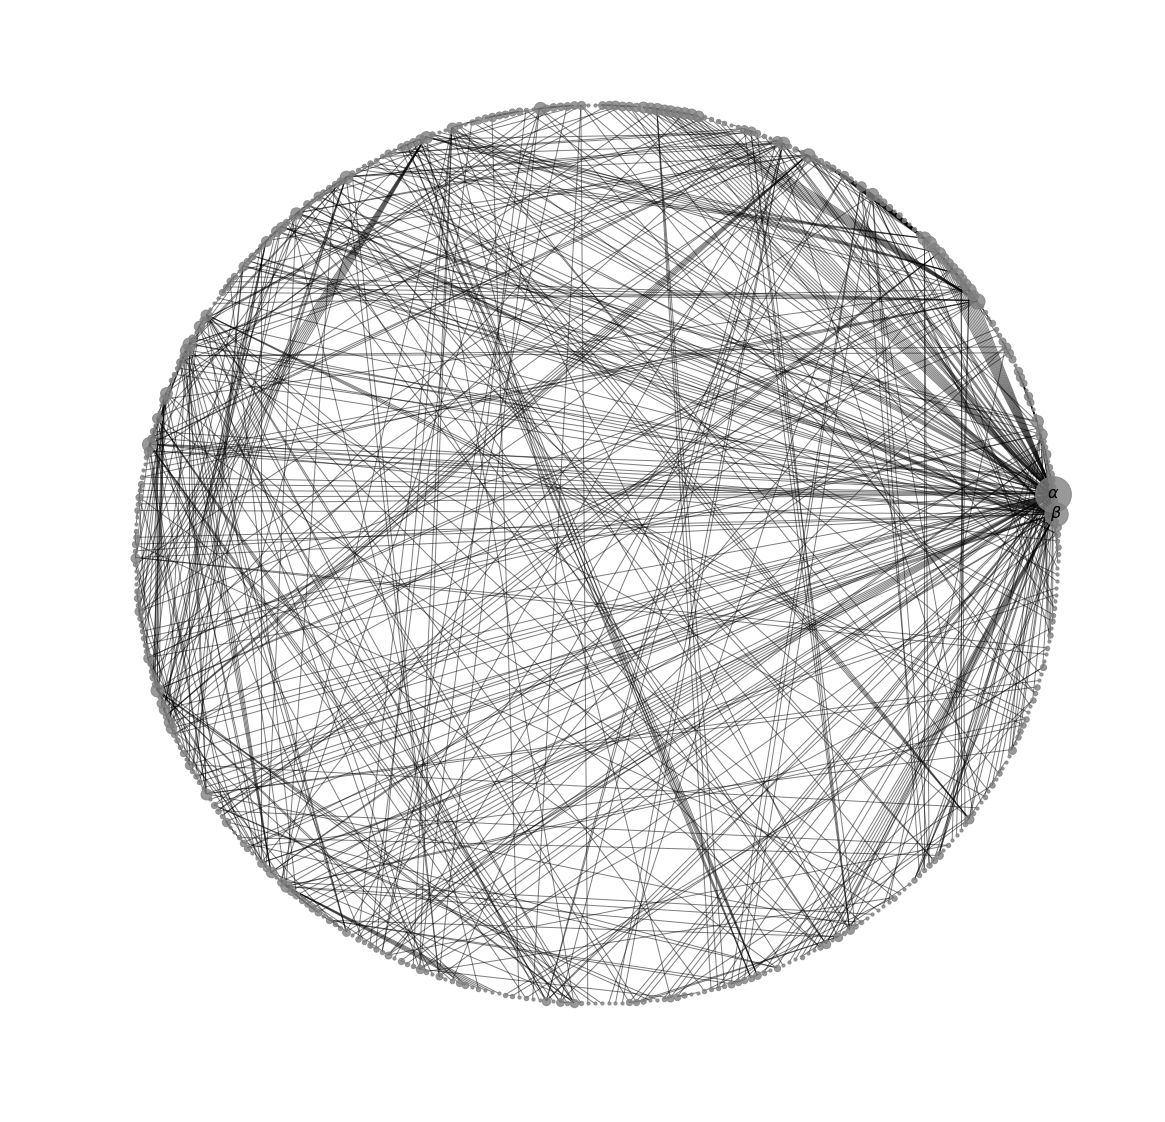

In [34]:
fibonacci_seq_id, catalan_seq_id = 'A000045', 'A000108'
graphing.draw_nx_graph(G, nodes_labels={'draw':True, fibonacci_seq_id:r'$\alpha$', catalan_seq_id:r'$\beta$'},
                       layout=lambda l: l.circular_layout)

### Dominating set

In [32]:
dom_set = nx.dominating_set(G, start_with=fibonacci_seq_id)

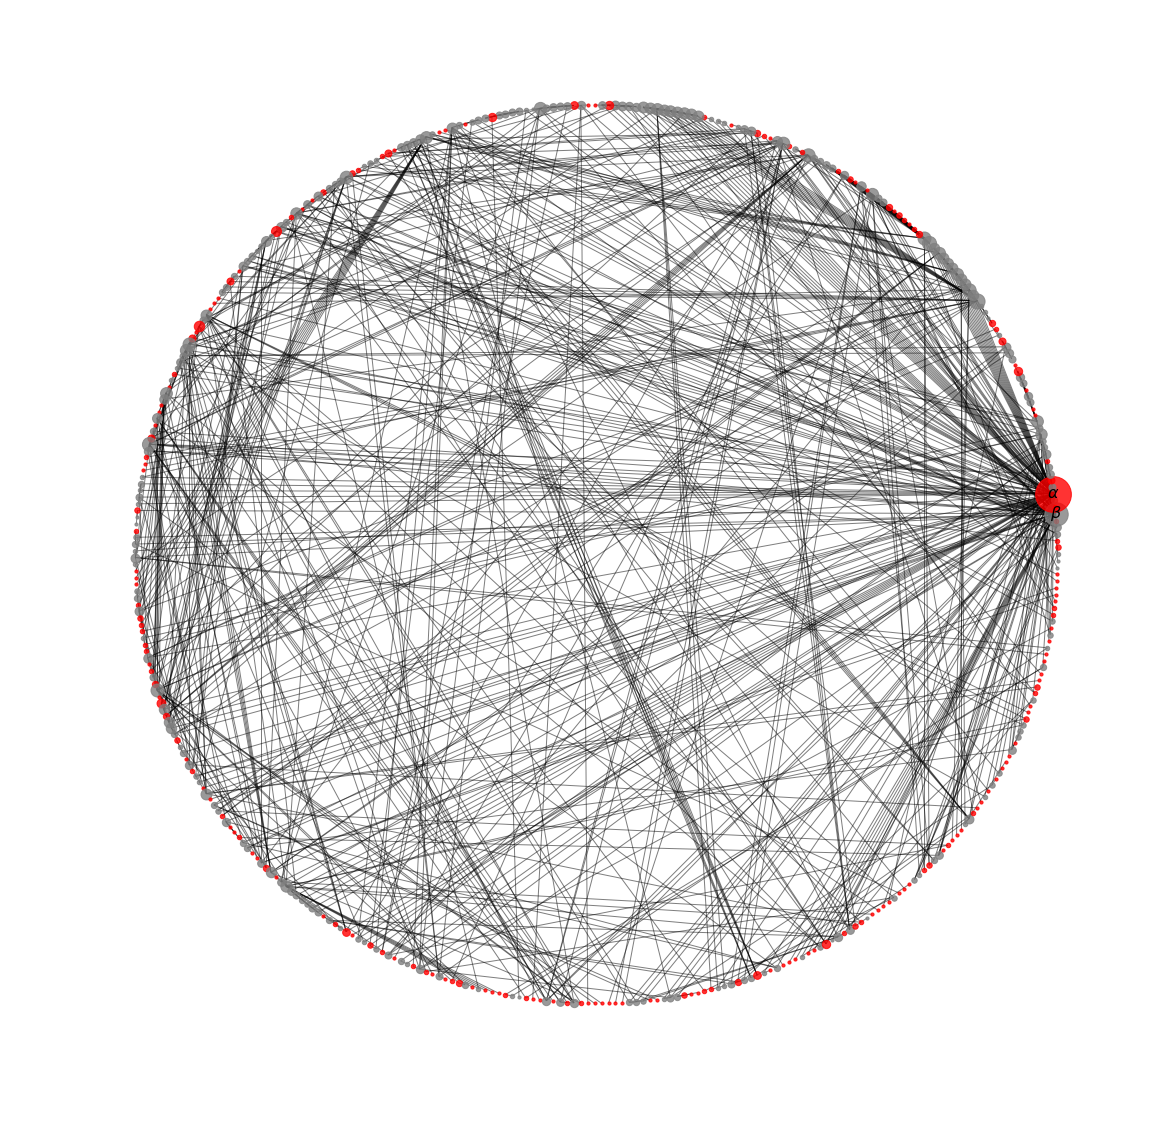

In [37]:
graphing.draw_nx_graph(G, 
                       nodes_colors={n:'r' for n in dom_set},
                       nodes_labels={'draw':True, fibonacci_seq_id:r'$\alpha$', catalan_seq_id:r'$\beta$'},
                       layout=lambda l: l.circular_layout)

In [46]:
%%bash 
python3.6 ../src/crawling.py --cache-dir ../src/fetched/

419 sequences in cache ../src/fetched/
1716 sequences in fringe for restarting


---

## `networkx` example

Taken from the [official documentation][example].

[example]:https://networkx.github.io/documentation/networkx-1.10/examples/drawing/labels_and_colors.html

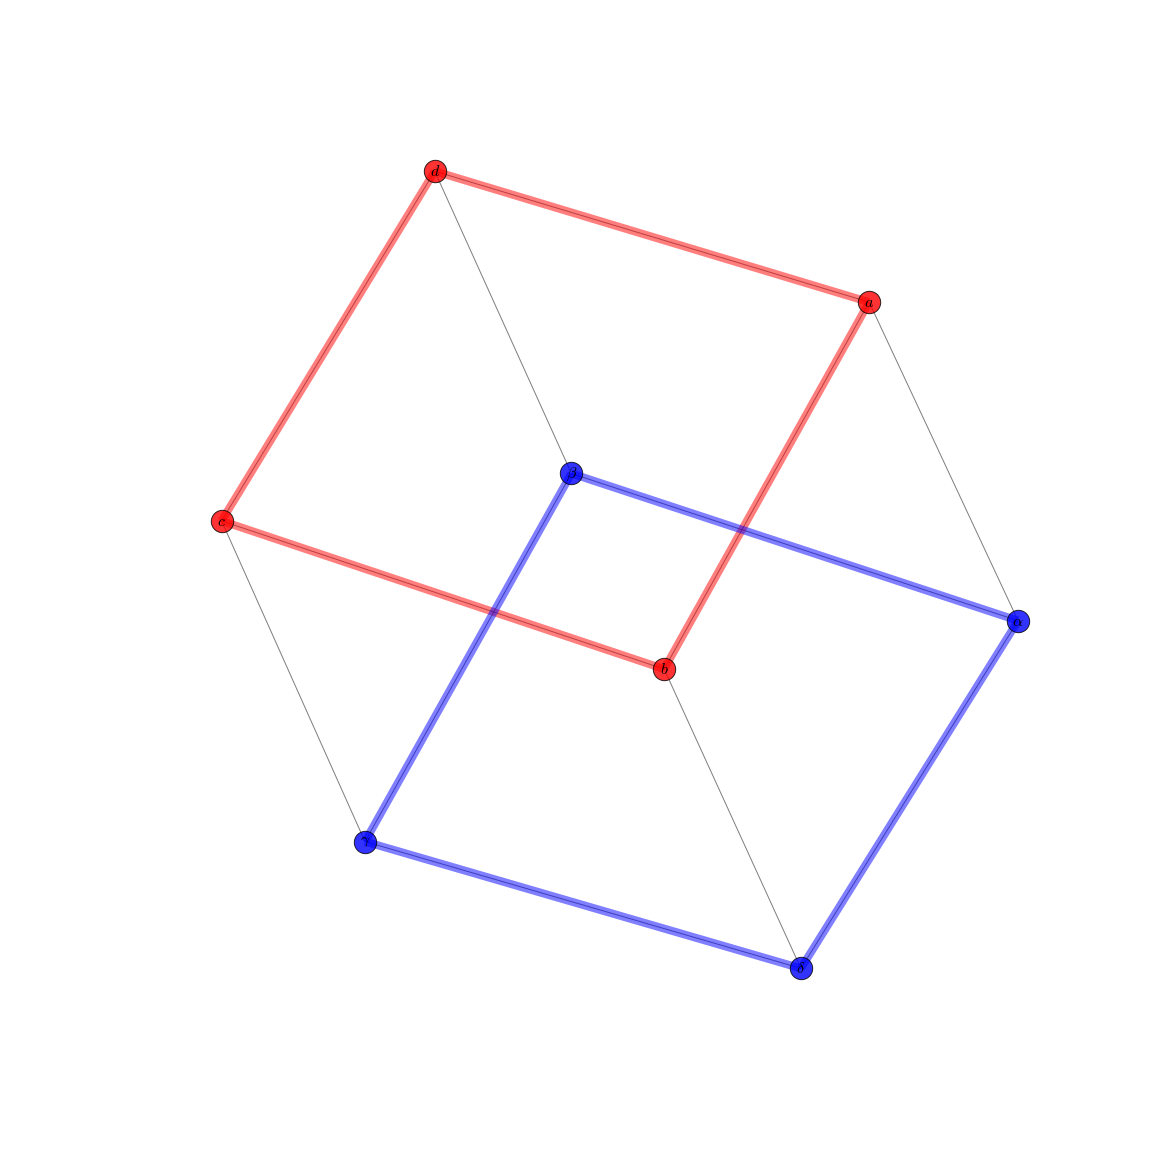

In [3]:

G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[4,5,6,7],
                       node_color='b',
                       node_size=500,
                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,
                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
                       width=8,alpha=0.5,edge_color='b')


# some math labels
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(G,pos,labels,font_size=16)

plt.axis('off')
plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.